In [1]:
#import all what we need
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load data from Kaggle
df=pd.read_csv('train h.csv')

In [3]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
#First lets do EDA
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.shape

(1460, 81)

In [6]:
# Look at missing values
#Seems alley collumn have to many missing values,better to drop it along with LotFrontage
df.isnull().sum().head(30)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
dtype: int64

In [7]:
df=df.drop(['Alley','LotFrontage'],axis=1)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# correlation matrix
df.corr().head(45)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [10]:
corr=df.corr()

In [11]:
# Find features that are higly correlated to Sale price,took module
corr[abs(corr['SalePrice'])>0.5]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.005587,0.131608,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,0.016570,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


In [12]:
highly_corr_columns=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea','SalePrice']

In [13]:
highly_corr = df[highly_corr_columns]

In [14]:
highly_corr.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


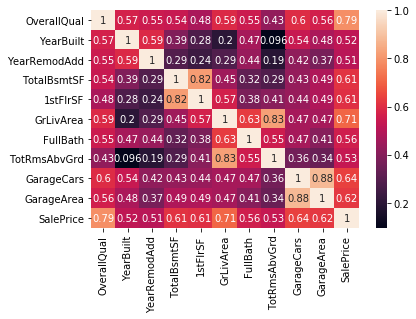

In [15]:
#plot correl matrix
corrMatrix = highly_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

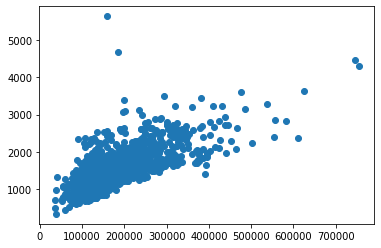

In [16]:
#Scatter plot
plt.scatter(highly_corr.SalePrice,highly_corr.GrLivArea )
plt.show()

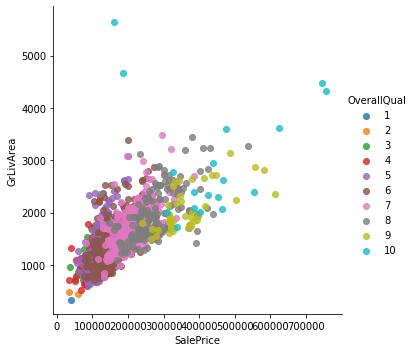

In [17]:
# added grouping variable "overall quality".
ax=sns.lmplot(x='SalePrice',y='GrLivArea',hue='OverallQual',data=highly_corr,fit_reg=False)
ax.set_xlabels('SalePrice')
ax.set_ylabels('GrLivArea')

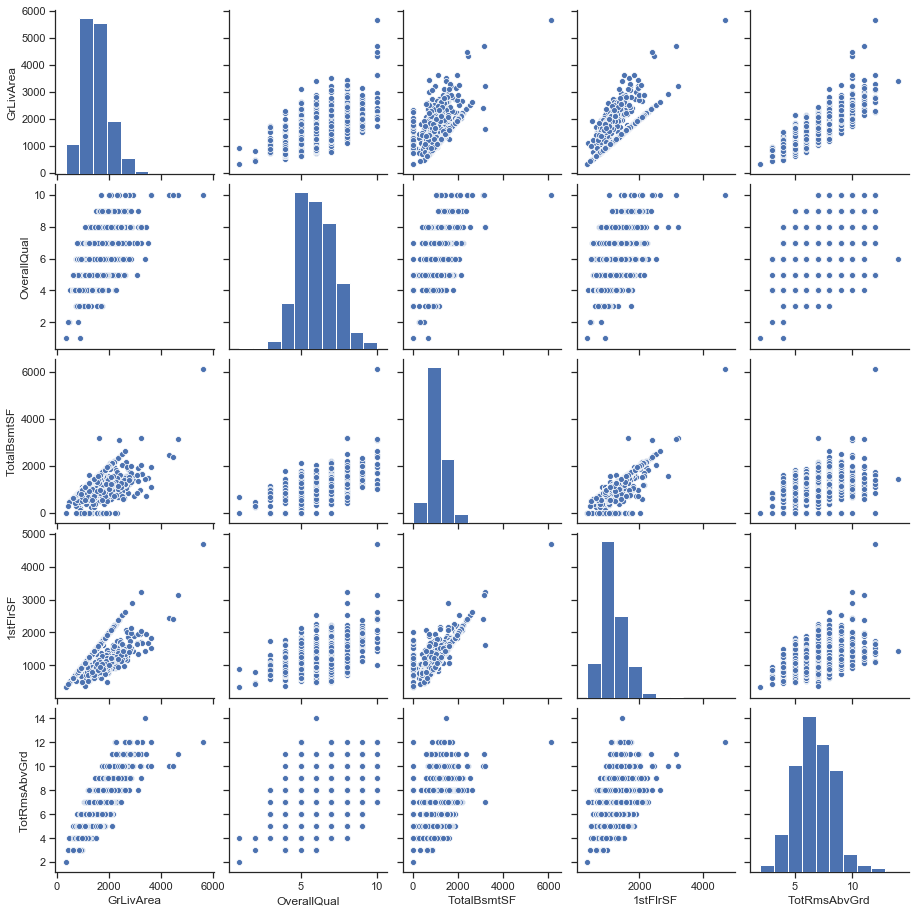

In [18]:
# look at correlation between indepenent variables
# we found multicollinearity between independ variables,for example TotRmsAbvGrd and GrLivArea are highly correlated
#It is bad for p_value, but not bad for predictions https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(highly_corr,vars=['GrLivArea','OverallQual','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'])

In [19]:
highly_corr.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


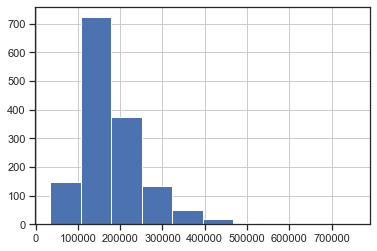

In [20]:
#brief glance on distribution of our target veariable before modelling
highly_corr.SalePrice.hist()

#Build baseline, without any feauture selection at first point

In [21]:
# we will use pycaret lib
from pycaret.regression import *

In [22]:
#preprocessing using pycaret
reg = setup(data = highly_corr, target = 'SalePrice', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 11)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [23]:
#best model catboost
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19387.515900,954031776.986900,30100.904200,0.855200,0.160200,0.117200
1,Extreme Gradient Boosting,20641.981400,1058322895.523600,31916.749000,0.836900,0.168500,0.124100
2,Light Gradient Boosting Machine,21723.532500,1175720410.399900,33700.564400,0.822500,0.175700,0.129700
3,Gradient Boosting Regressor,21175.525700,1172923535.501800,33221.314500,0.822300,0.171600,0.127200
4,Random Forest,21201.151900,1217193127.032000,33952.603700,0.818200,0.173500,0.127400
5,Extra Trees Regressor,21843.543600,1215295325.253200,33582.769300,0.817200,0.179200,0.132300
6,Random Sample Consensus,21677.202200,1469908012.751800,36546.353200,0.779800,0.172300,0.128400
7,Ridge Regression,22695.231800,1586132702.928200,38298.661200,0.763000,0.178300,0.134300
8,Lasso Least Angle Regression,22787.841800,1593883307.562300,38404.103900,0.761800,0.178500,0.134300
9,Lasso Regression,22824.713900,1596320474.751000,38428.019900,0.761400,0.178700,0.134500


In [25]:
catboost=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21916.0912,2.201785e+09,46923.1818,0.7311,0.1985,0.1317
1,21306.7277,1.168046e+09,34176.6865,0.8177,0.1517,0.1101
2,16042.9925,5.108901e+08,22602.8783,0.8894,0.1460,0.1077
3,18600.0756,8.444313e+08,29059.0999,0.8372,0.1548,0.1107
4,21220.8262,9.514965e+08,30846.3374,0.9032,0.1816,0.1391
5,19118.9293,7.135969e+08,26713.2343,0.9011,0.1656,0.1222
6,17689.7963,6.472208e+08,25440.5343,0.8627,0.1456,0.1068
7,23511.5431,1.277182e+09,35737.6769,0.8126,0.1863,0.1420
8,17365.9131,6.030106e+08,24556.2748,0.9100,0.1477,0.1094
9,17102.2638,6.226591e+08,24953.1382,0.8872,0.1241,0.0925


In [27]:
#auto tune doesn't give a positive result,we will use base model
tuned_catboost = tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23937.3619,2.251205e+09,47446.8663,0.7250,0.1965,0.1355
1,22706.8881,1.200822e+09,34652.8830,0.8126,0.1570,0.1198
2,16057.5235,4.954752e+08,22259.2714,0.8927,0.1447,0.1066
3,18551.7226,8.594579e+08,29316.5125,0.8343,0.1576,0.1100
4,20339.6826,9.151362e+08,30251.2177,0.9069,0.1801,0.1324
5,19038.9405,6.364246e+08,25227.4568,0.9118,0.1690,0.1239
6,18365.0788,7.258564e+08,26941.7230,0.8460,0.1563,0.1126
7,23191.2475,1.247093e+09,35314.2000,0.8170,0.1840,0.1407
8,18325.1942,7.721144e+08,27786.9466,0.8848,0.1558,0.1144
9,19811.3059,8.651319e+08,29413.1243,0.8432,0.1330,0.1032


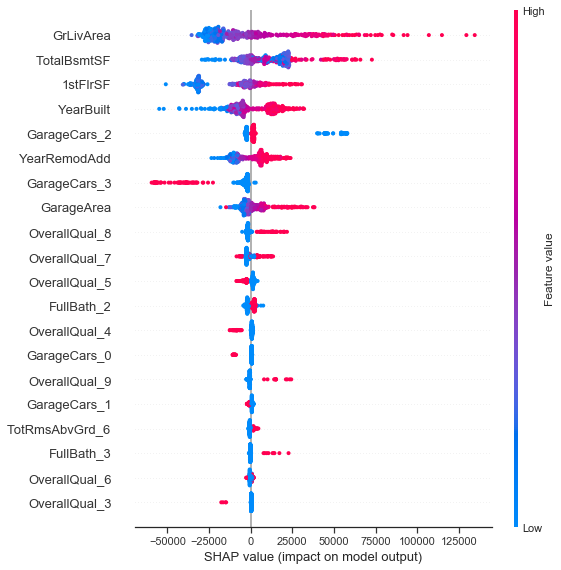

In [29]:
# model interpretation
# Article about SHAP: https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
interpret_model(catboost)

Most valuable features:GRLivArea(Above grade (ground) living area square feet), TotalBsmtSF(Total square feet of basement area),1stFlrSF(First Floor square feet),YearBuilt

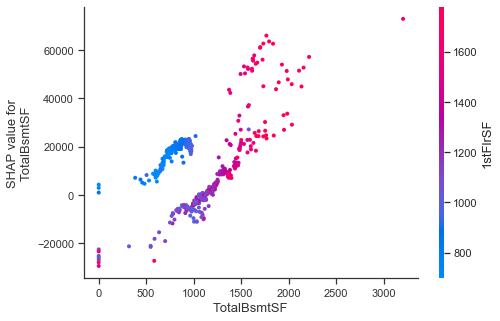

In [43]:
#plot dependence plot
interpret_model(catboost,plot='correlation',feature='TotalBsmtSF')

This plot shows there is an approximately linear and positive trend between “Totalbsmt” and the target variable, and “Totalbsmt” interacts with “sulphates” frequently, which is rather obvious

In [45]:
# RMSE= 29368 on train set
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,19061.5323,8.624980e+08,29368.3158,0.8494,0.1472,0.1067


,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,...,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,SalePrice,Label
0,2001.0,2001.0,884.0,884.0,2035.0,434.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,222500,225419.2519
1,1900.0,1950.0,1095.0,1095.0,1774.0,779.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,87000,132521.4687
2,2004.0,2004.0,976.0,976.0,1708.0,380.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130000,162842.8110
3,1998.0,1998.0,1108.0,1108.0,2097.0,583.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,274300,238347.3624
4,1945.0,1950.0,913.0,1048.0,1558.0,288.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,140000,133094.1030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1914.0,2006.0,684.0,773.0,1355.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,127000,108162.6085
435,1954.0,1954.0,811.0,811.0,1387.0,256.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,93000,127606.3196
436,2005.0,2005.0,1030.0,1038.0,2098.0,878.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,275500,280139.9895
437,2003.0,2004.0,998.0,1006.0,2046.0,871.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,284000,264468.1954


In [47]:
#Now we finalize model. And train it on the whole dataset
final_catboost = finalize_model(catboost)

In [49]:
#Load teest dataset
test=pd.read_csv('test h.csv')

In [50]:
# Predictions ot test data
test_predictions = predict_model(final_catboost, data=test)
test_predictions.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,129087.7161
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,153949.6278
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,177109.7303
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,175792.1937
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,185682.0632


In [53]:
#Prepare for submit
submit_columns=['Id','Label']
submit = test_predictions[submit_columns]
submit=submit.rename(columns={"Label": "SalePrice"})
submit.head()

,Id,SalePrice
0,1461,129087.7161
1,1462,153949.6278
2,1463,177109.7303
3,1464,175792.1937
4,1465,185682.0632


In [54]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        import os
        os.remove(csv_file_name)

In [55]:
csv_download_link(submit, 'submit.csv')

C:\Users\PC\submit.csv

Press enter to delete the file after you have downloaded it.
